In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
account_df = pd.read_pickle('dataset/account.pkl')
trans_df = pd.read_pickle('dataset/trans.pkl')
card_df = pd.read_pickle('dataset/card.pkl')
client_df = pd.read_pickle('dataset/client.pkl')
disp_df = pd.read_pickle('dataset/disp.pkl')
district_df = pd.read_pickle('dataset/district.pkl')
loan_df = pd.read_pickle('dataset/loan.pkl')
order_df = pd.read_pickle('dataset/order.pkl')

trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null datetime64[ns]
type          1056320 non-null object
operation     1056320 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      1056320 non-null object
bank          273508 non-null object
account       295389 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [3]:
'''Plotting functions'''
from itertools import cycle, islice

# Use gradient colors for bigger plots
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pd.DataFrame(x)
gradient_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))]

'''Simple Deloitte colors'''
deloitte_simple_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
simple_colors = [(0.5, 0.4, 0.5), (0.75, 0.75, 0.25), (0.4, 0.75, 0.25)]*5 

def histogram(df, col_name, bins):
    # look at loan_duration.
    plt.hist(df[col_name], alpha=0.5, label=col_name, bins=bins)
    plt.legend(loc='upper right')
    plt.show()

def barchart(df, col_name):
    df[col_name].value_counts().plot(kind='bar', subplots=False, color=simple_colors )

def boxplot(df, col_names, by=None):
    #fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
    df.boxplot(column=col_names, return_type='axes', by=by, figsize=(30,20))

def histogram_by_level(df, varName, targetName):
    lvls = df[varName].value_counts()
    for i in lvls.index:
        plt.hist(df[df[varName] == i][targetName], alpha=0.5, label=i, bins=300)

    plt.legend(loc='upper right')
    plt.show()

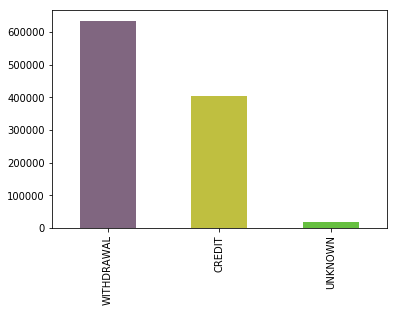

In [4]:
barchart(trans_df, 'type')

In [5]:
trans_df.head()

trans_id  account_id       date    type       operation  amount  balance  \
0    695247        2378 1993-01-01  CREDIT  CREDIT_IN_CASH   700.0    700.0   
1    171812         576 1993-01-01  CREDIT  CREDIT_IN_CASH   900.0    900.0   
2    207264         704 1993-01-01  CREDIT  CREDIT_IN_CASH  1000.0   1000.0   
3   1117247        3818 1993-01-01  CREDIT  CREDIT_IN_CASH   600.0    600.0   
4    579373        1972 1993-01-02  CREDIT  CREDIT_IN_CASH   400.0    400.0   

  k_symbol bank  account  
0  UNKNOWN  NaN      NaN  
1  UNKNOWN  NaN      NaN  
2  UNKNOWN  NaN      NaN  
3  UNKNOWN  NaN      NaN  
4  UNKNOWN  NaN      NaN

In [29]:
# Prepare "date" info for plotting

trans_df['year'] = [d.year for d in trans_df.date]
trans_df['month'] = [d.strftime('%b') for d in trans_df.date]
years = trans_df['year'].unique()
print(years)

[1993 1994 1995 1996 1997 1998]


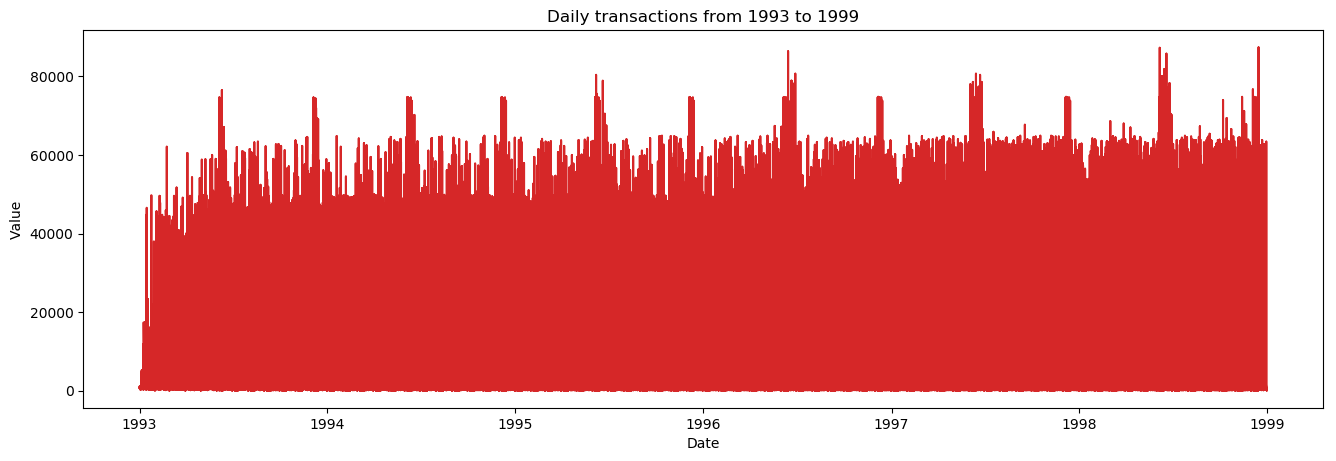

In [30]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(trans_df, x=trans_df.date, y=trans_df.amount, title='Daily transactions from 1993 to 1999')  

In [9]:
'''Prep Colors''' 
#np.random.seed(100)
#mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

'''Draw Plot''' 
#plt.figure(figsize=(16,12), dpi= 80)
#for i, y in enumerate(years):
#    if i > 0:        
#        plt.plot('month', 'amount', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
#        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'amount'][-1:].values[0], y, fontsize=12, color=mycolors[i])

'''Decoration'''
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 100), ylabel='$Transactions$', xlabel='$Month$')
#plt.yticks(fontsize=12, alpha=.7)
#plt.title("Seasonal Plot of transactions per month", fontsize=20)
#plt.show()


'Decoration'

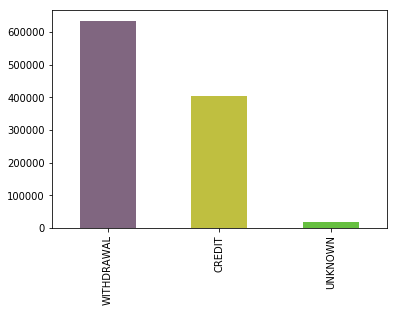

In [31]:
'''here we see there is a small number of unknown transaction types''' 
barchart(trans_df, 'type')

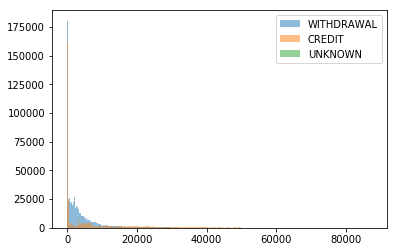

In [32]:
'''histogram by transaction type shows the highly skewed nature of transaction amounts.'''
histogram_by_level(trans_df, 'type', 'amount')

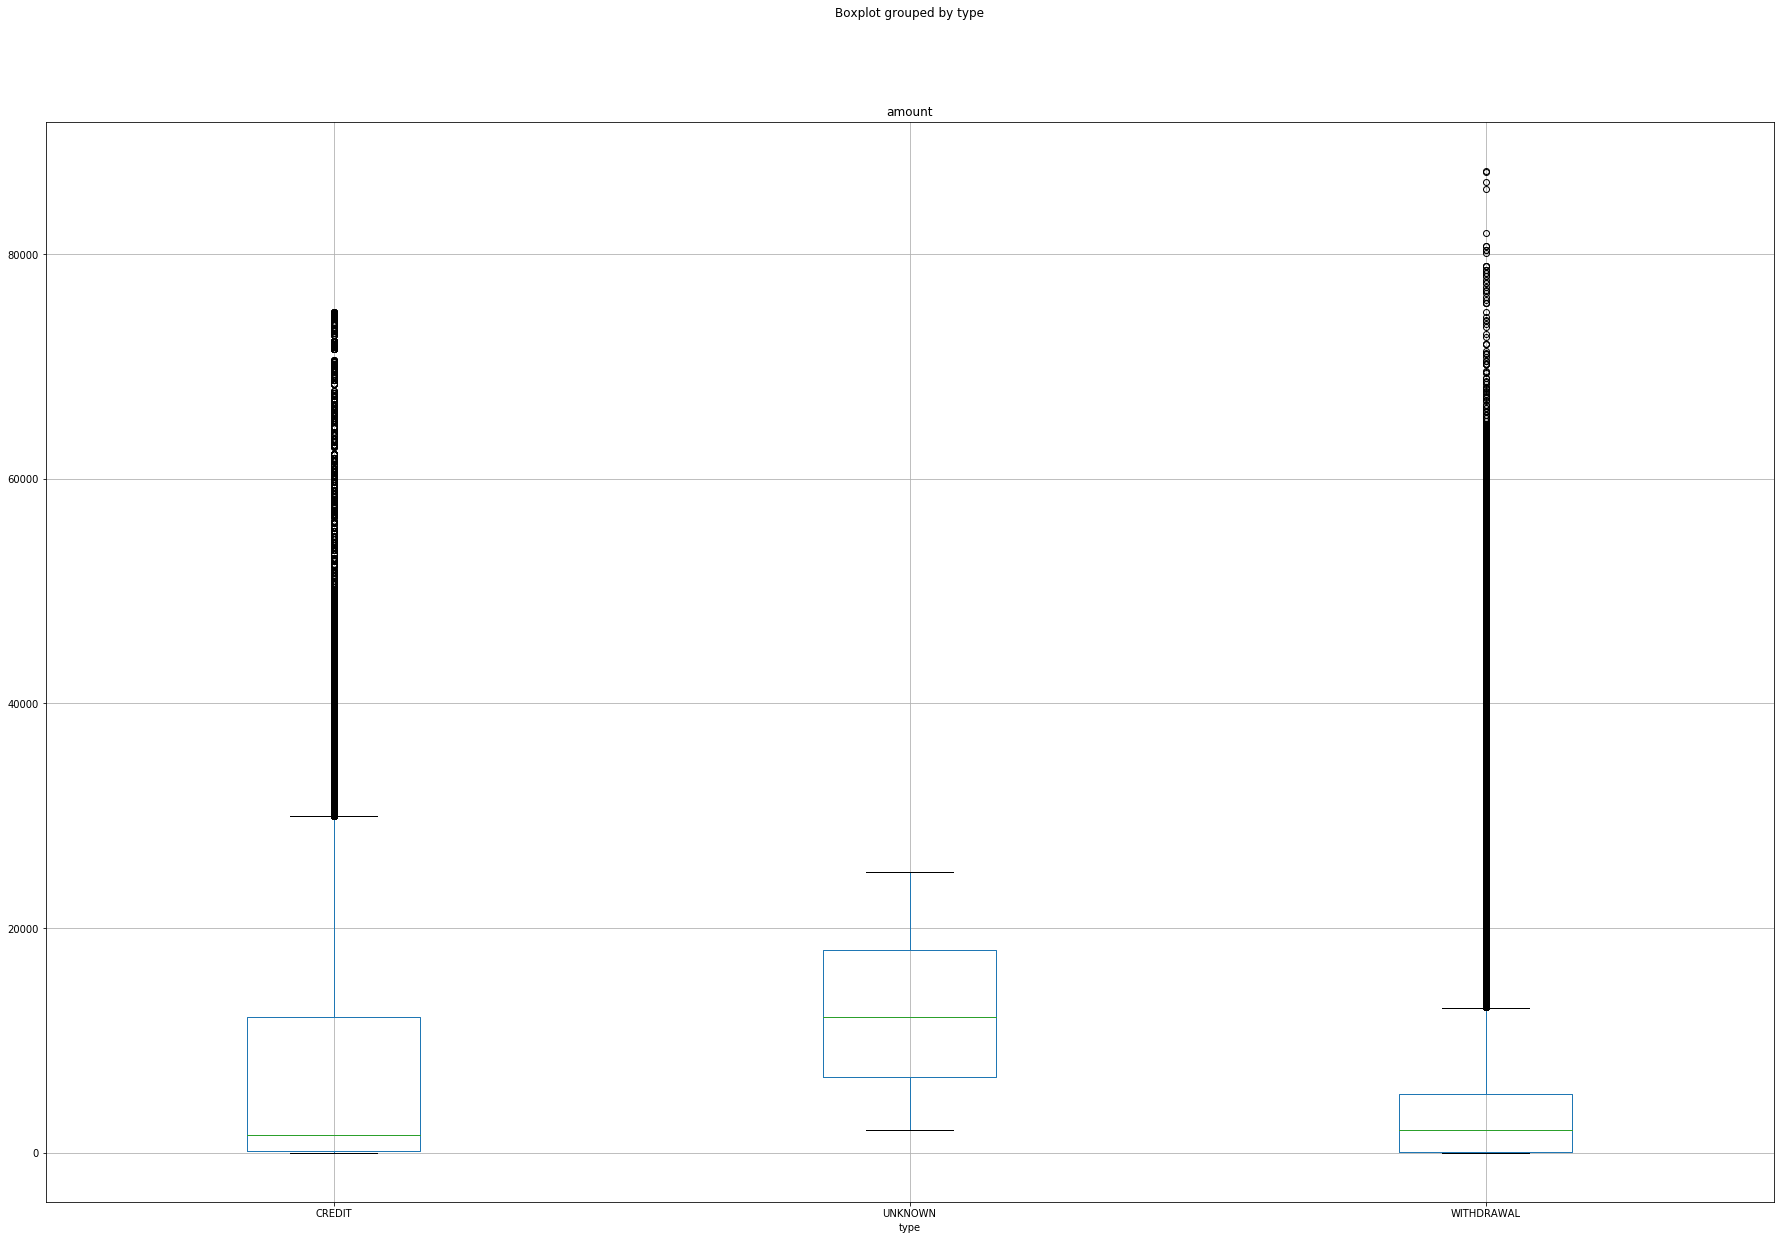

In [33]:
''' examining the boxplots we can see that is more heavily skewed for withdrawals than credits. '''
boxplot(trans_df, ['amount'], by='type')


In [34]:
print(trans_df.amount[trans_df['type'] == 'CREDIT'].quantile(0.90))
print(trans_df.amount[trans_df['type'] == 'WITHDRAWAL'].quantile(0.90))
print(trans_df['amount'].skew())

24400.0
11601.0
2.5906440655913787


In [35]:
#trans_df.amount[trans_df['type'] == 'CREDIT'] = np.where((trans_df.amount[trans_df['type'] == 'CREDIT'] < 24400.0), 24400.0,(trans_df.amount[trans_df['type'] == 'CREDIT']))
#trans_df.amount[trans_df['type'] == 'WITHDRAWAL'] = np.where(trans_df.amount[trans_df['type'] == 'WITHDRAWAL'] > 11601.0, 11601.0,trans_df.amount[trans_df['type'] == 'WITHDRAWAL'])
#print(trans_df['amount'].skew())
#credit_out_df = trans_df[trans_df[trans_df['type'] == 'CREDIT'].amount < 24400.0]

# The outliers for Amount seem to be univariate. Therefore, we should keep them, but we should not rely on the average 
#for 'amount' (skewness too high)

credit_df = trans_df[trans_df['type'] == 'CREDIT']
credit_out_df = credit_df[credit_df.amount > 24400.0]
credit_out_df.trans_id.count()
credit_out_df.sort_values('amount', ascending=False)
credit_out_df.info()
credit_out_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40493 entries, 73 to 1051813
Data columns (total 12 columns):
trans_id      40493 non-null int64
account_id    40493 non-null int64
date          40493 non-null datetime64[ns]
type          40493 non-null object
operation     40493 non-null object
amount        40493 non-null float64
balance       40493 non-null float64
k_symbol      40493 non-null object
bank          11237 non-null object
account       11237 non-null float64
year          40493 non-null int64
month         40493 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 4.0+ MB


trans_id  account_id       date    type                   operation  \
73    1548750        5270 1993-01-14  CREDIT  COLLECTION_FROM_OTHER_BANK   
76     621775        2122 1993-01-15  CREDIT              CREDIT_IN_CASH   
104    695262        2378 1993-01-24  CREDIT              CREDIT_IN_CASH   
106    615547        2099 1993-01-24  CREDIT              CREDIT_IN_CASH   
129    393512        1338 1993-01-29  CREDIT              CREDIT_IN_CASH   

      amount  balance k_symbol bank     account  year month  
73   44749.0  45549.0  UNKNOWN   IJ  80269753.0  1993   Jan  
76   46552.0  46852.0  UNKNOWN  NaN         NaN  1993   Jan  
104  49752.0  72160.0  UNKNOWN  NaN         NaN  1993   Jan  
106  36518.0  53743.0  UNKNOWN  NaN         NaN  1993   Jan  
129  38000.0  38400.0  UNKNOWN  NaN         NaN  1993   Jan

In [36]:
withdrawal_df = trans_df[trans_df['type'] == 'WITHDRAWAL']
withdrawal_out_df = withdrawal_df[withdrawal_df.amount > 11601.0]
withdrawal_out_df.trans_id.count()
withdrawal_out_df.sort_values('amount', ascending=False)
withdrawal_out_df.info()
withdrawal_out_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63431 entries, 136 to 1051804
Data columns (total 12 columns):
trans_id      63431 non-null int64
account_id    63431 non-null int64
date          63431 non-null datetime64[ns]
type          63431 non-null object
operation     63431 non-null object
amount        63431 non-null float64
balance       63431 non-null float64
k_symbol      63431 non-null object
bank          2346 non-null object
account       3110 non-null float64
year          63431 non-null int64
month         63431 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 6.3+ MB


trans_id  account_id       date        type           operation   amount  \
136    695560        2378 1993-01-31  WITHDRAWAL  WITHDRAWAL_IN_CASH  34700.0   
189    145127         485 1993-02-03  WITHDRAWAL  WITHDRAWAL_IN_CASH  25300.0   
249    622121        2122 1993-02-07  WITHDRAWAL  WITHDRAWAL_IN_CASH  14100.0   
301    695561        2378 1993-02-11  WITHDRAWAL  WITHDRAWAL_IN_CASH  25200.0   
309    615783        2099 1993-02-11  WITHDRAWAL  WITHDRAWAL_IN_CASH  29700.0   

     balance k_symbol bank  account  year month  
136  59453.7  UNKNOWN  NaN      NaN  1993   Jan  
189  46177.9  UNKNOWN  NaN      NaN  1993   Feb  
249  32859.1  UNKNOWN  NaN      NaN  1993   Feb  
301  85871.7  UNKNOWN  NaN      NaN  1993   Feb  
309  52262.4  UNKNOWN  NaN      NaN  1993   Feb

In [37]:
# We should replace the outliers with median values for our forecasts (winsorize)
print(withdrawal_df['amount'].median())
print(withdrawal_df['amount'].skew())

2042.0
3.5945590299809127


C:\Users\agarea\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


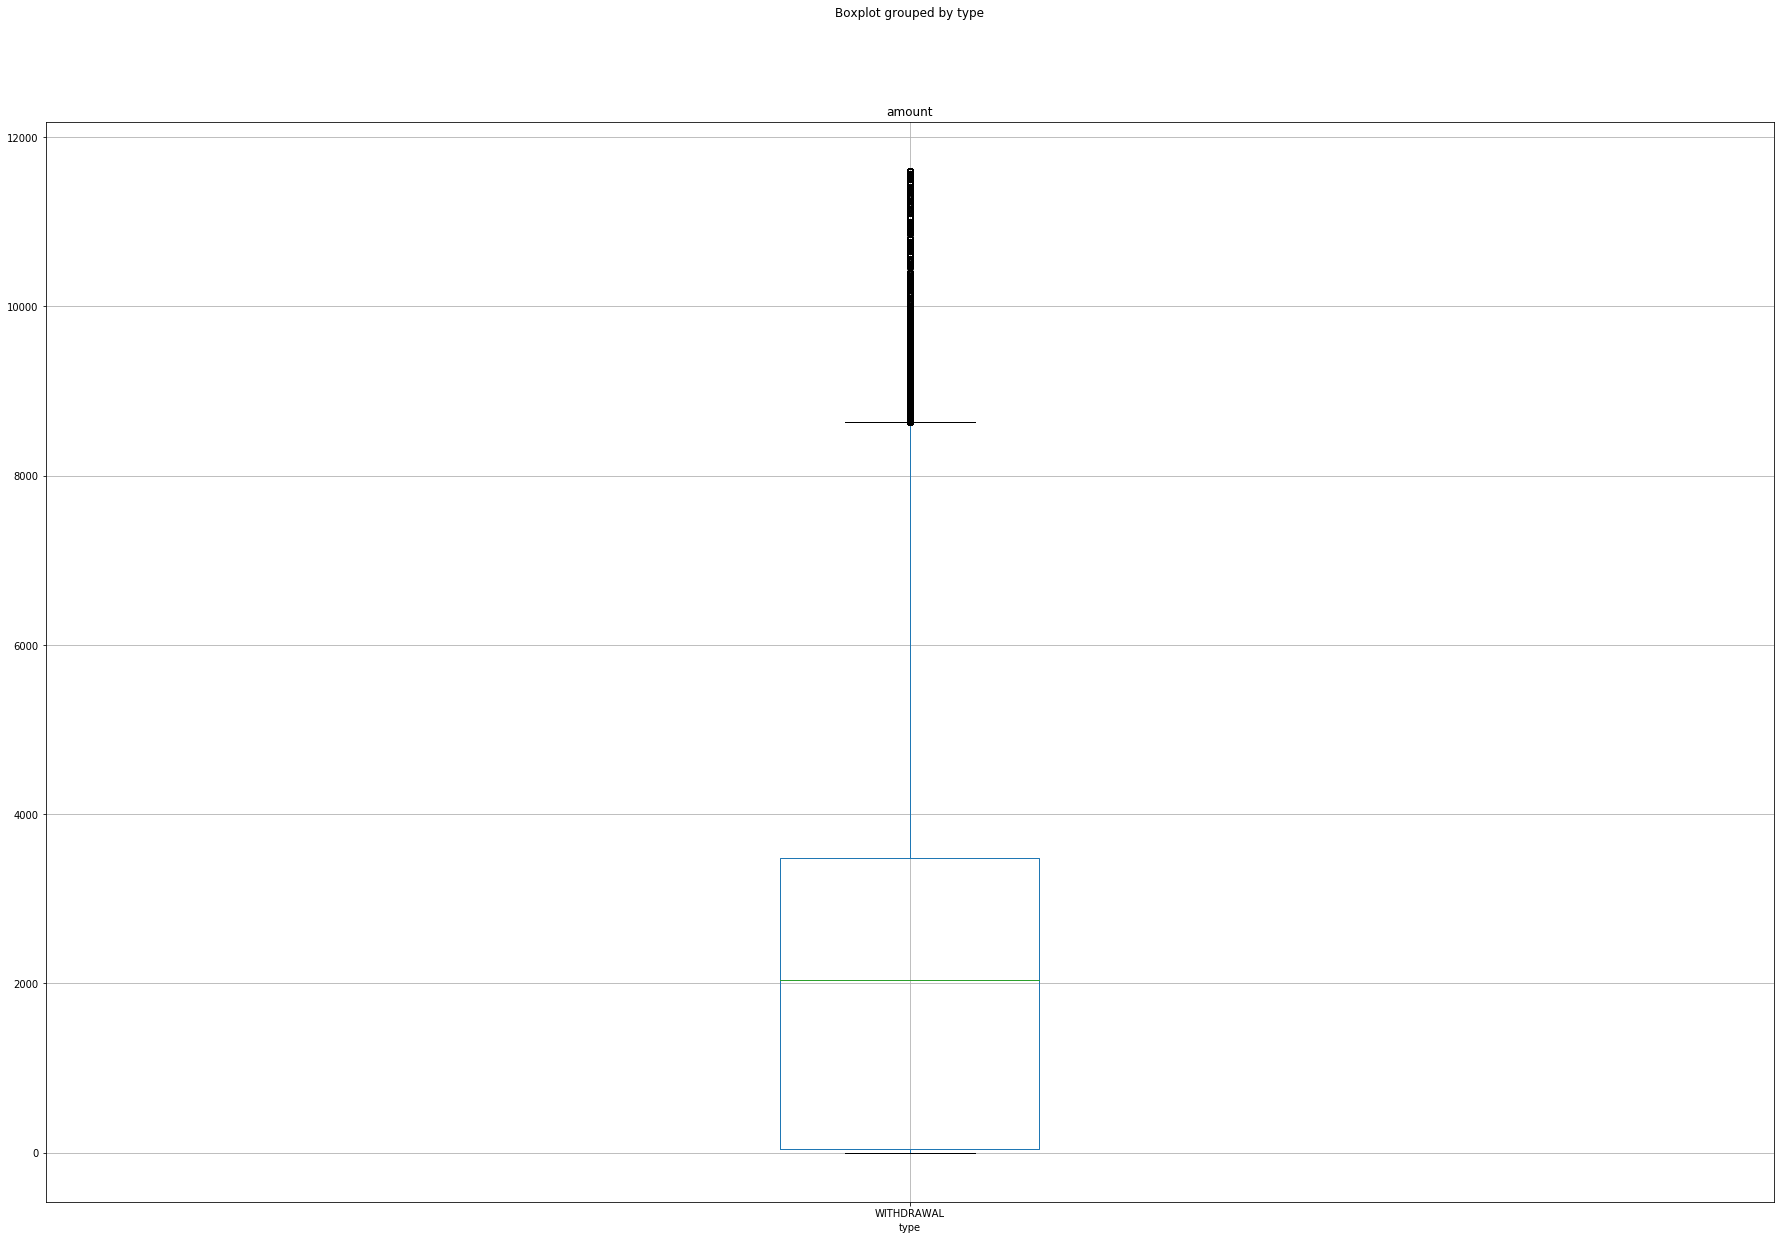

In [38]:
withdrawal_df['amount'] = np.where(withdrawal_df['amount'] > 11601.0, 2128.0, withdrawal_df['amount'])
boxplot(withdrawal_df, ['amount'], by='type')

In [39]:
print(withdrawal_df['amount'].skew()) #skweness dropped to 1.31

1.3309320147918915


1600.0
1.8341294101655825


C:\Users\agarea\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


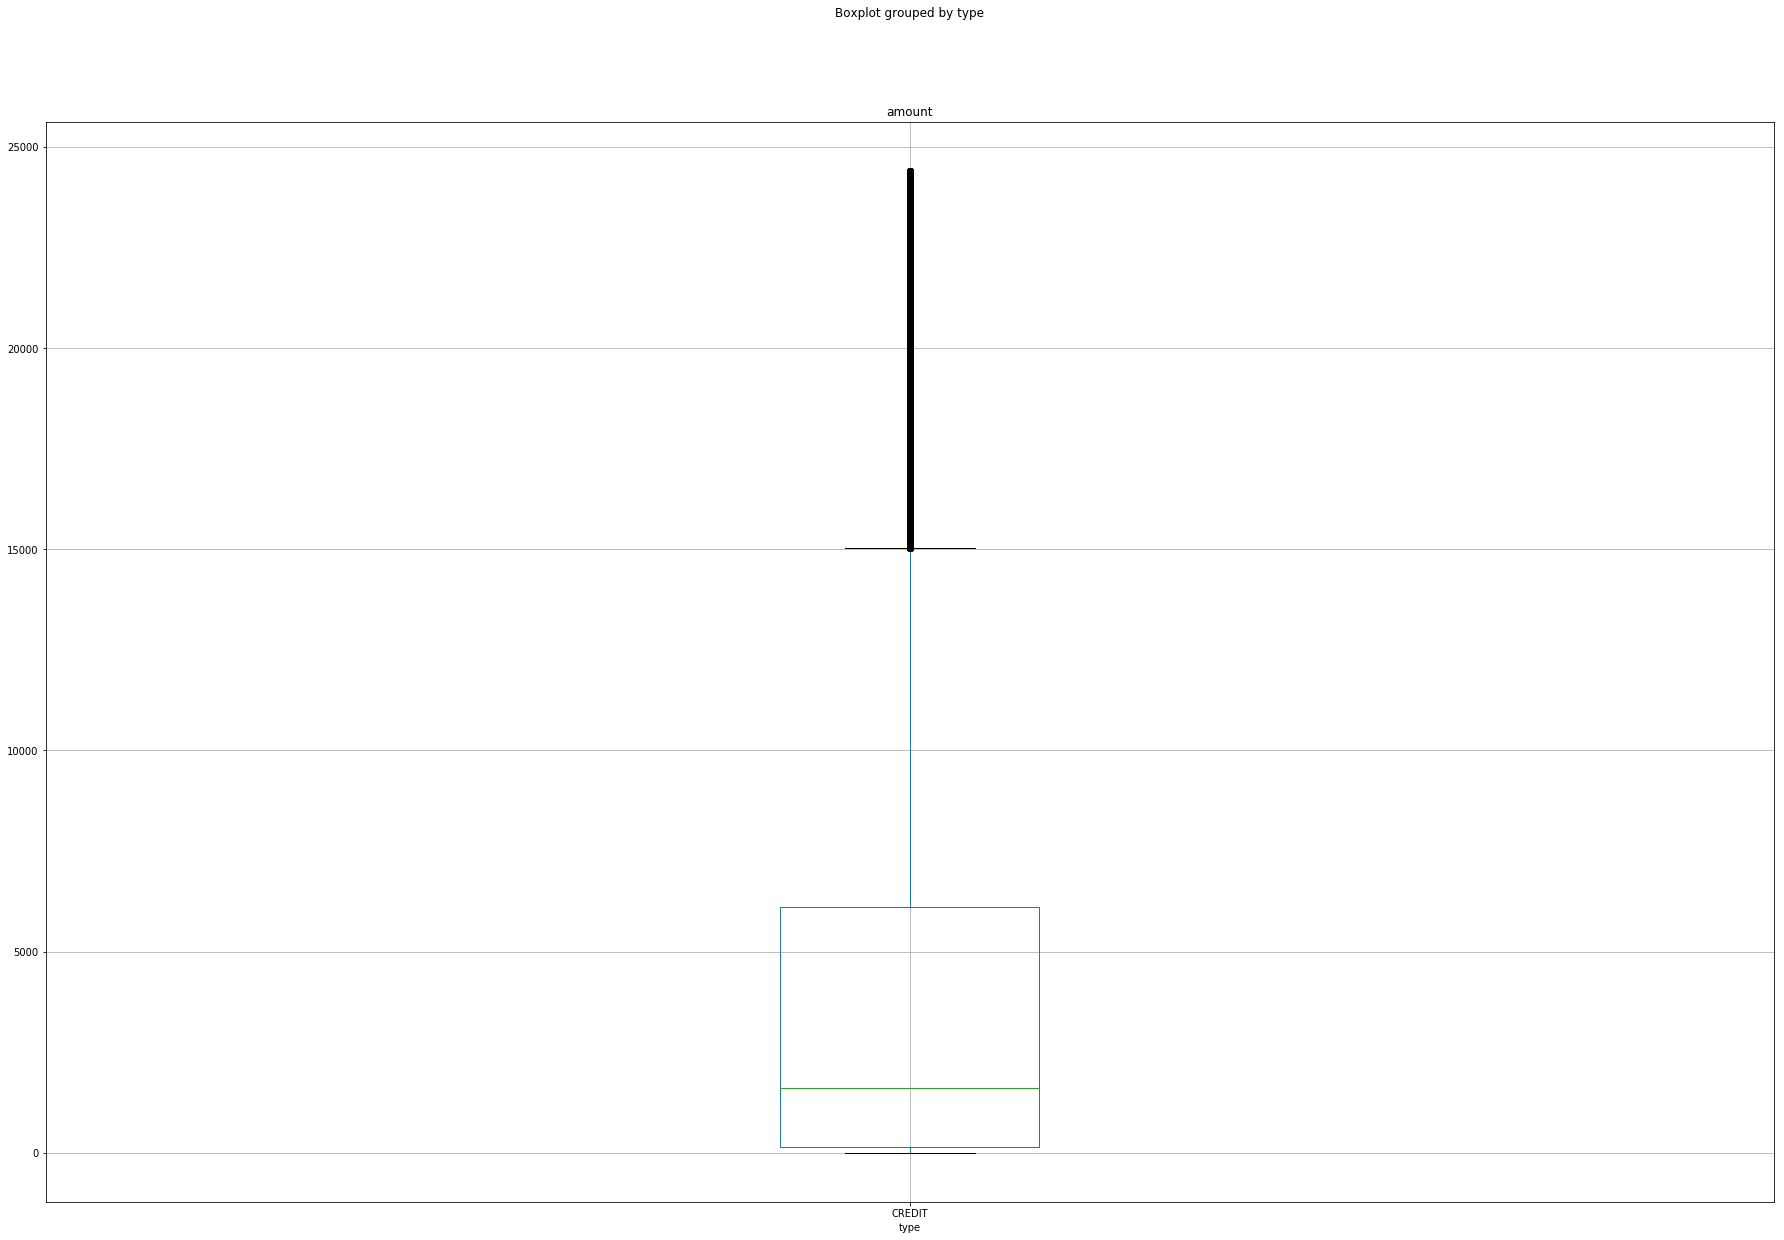

In [40]:
print(credit_df['amount'].median())
print(credit_df['amount'].skew())

credit_df['amount'] = np.where(credit_df['amount'] > 24400.0, 1600.0, credit_df['amount'])
boxplot(credit_df, ['amount'], by='type')

In [41]:
print(credit_df['amount'].skew()) #skweness dropped to 1.59

1.5909590488174623


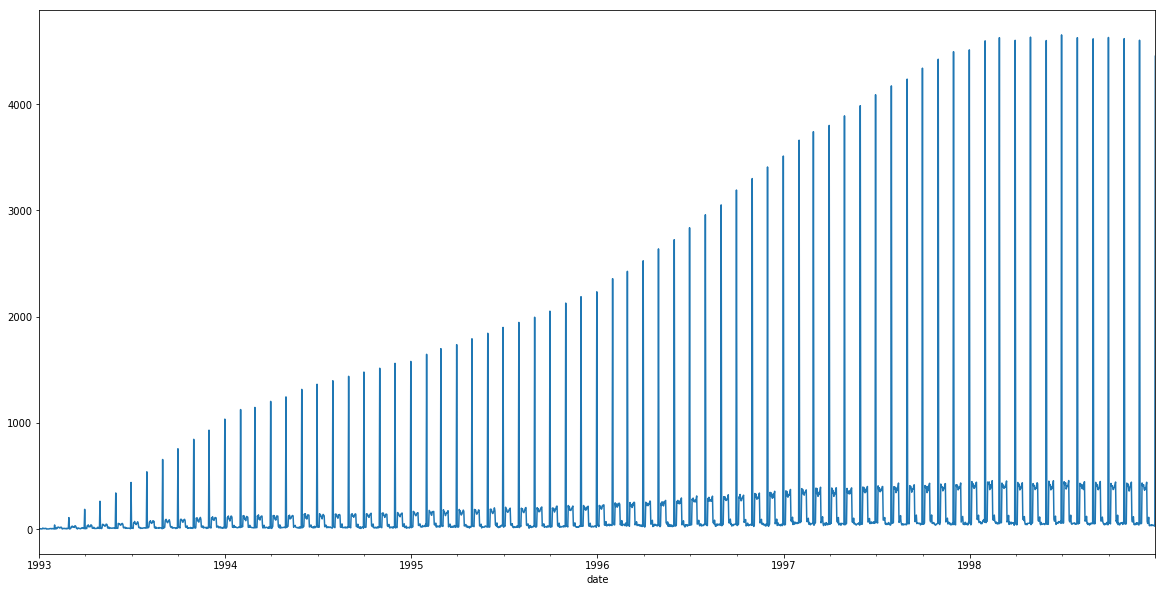

In [42]:
credit_gb = credit_df.groupby(['date'])
credit_by_date = credit_gb['amount'].count()
credit_by_date.plot(kind='line', subplots=False, figsize=(20,10))


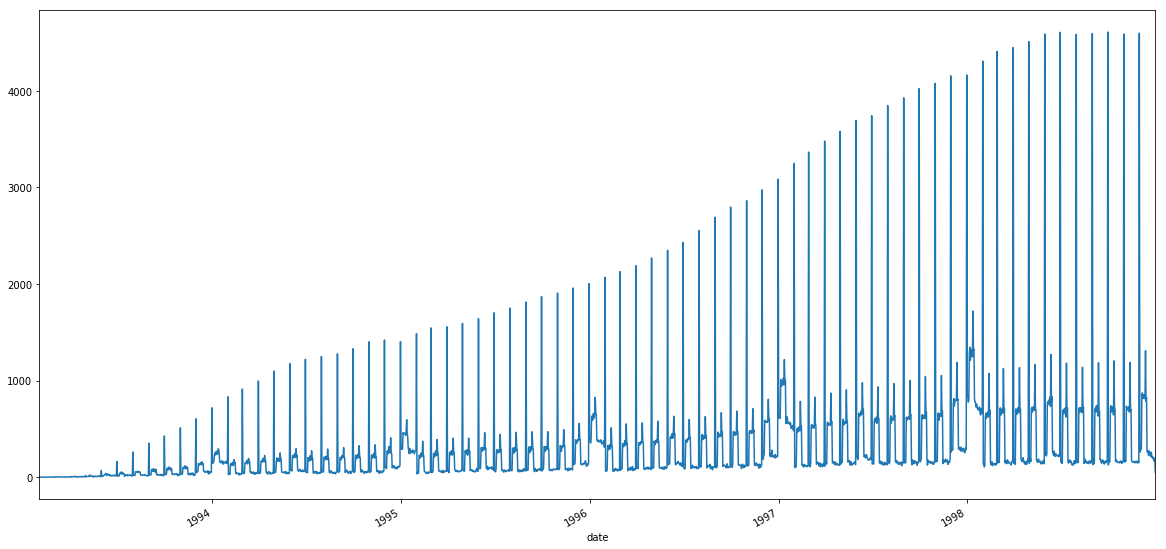

In [43]:
withdrawal_gb = withdrawal_df.groupby(['date'])
withdrawal_by_date = withdrawal_gb['trans_id'].count()
withdrawal_by_date.plot(kind='line', subplots=False, figsize=(20,10))
#The frequency of transactions rises with time

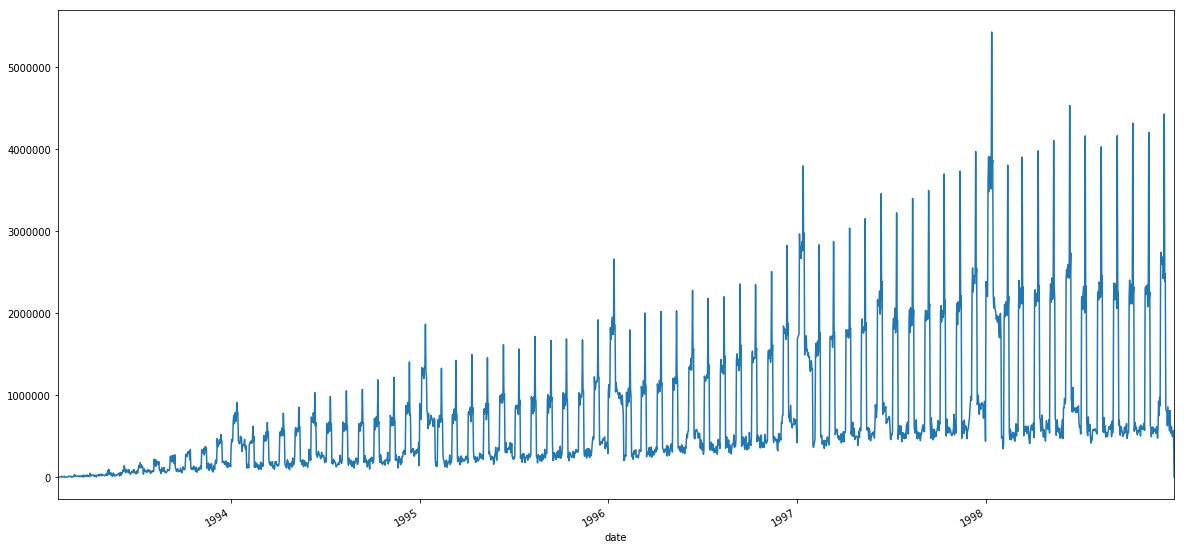

In [44]:
# Trend and seasonality
withdrawal_gb = withdrawal_df.groupby(['date'])
withdrawal_total_sum_by_date = withdrawal_gb['amount'].sum(axis=0)
withdrawal_total_sum_by_date.plot(kind='line', subplots=False, figsize=(20,10))

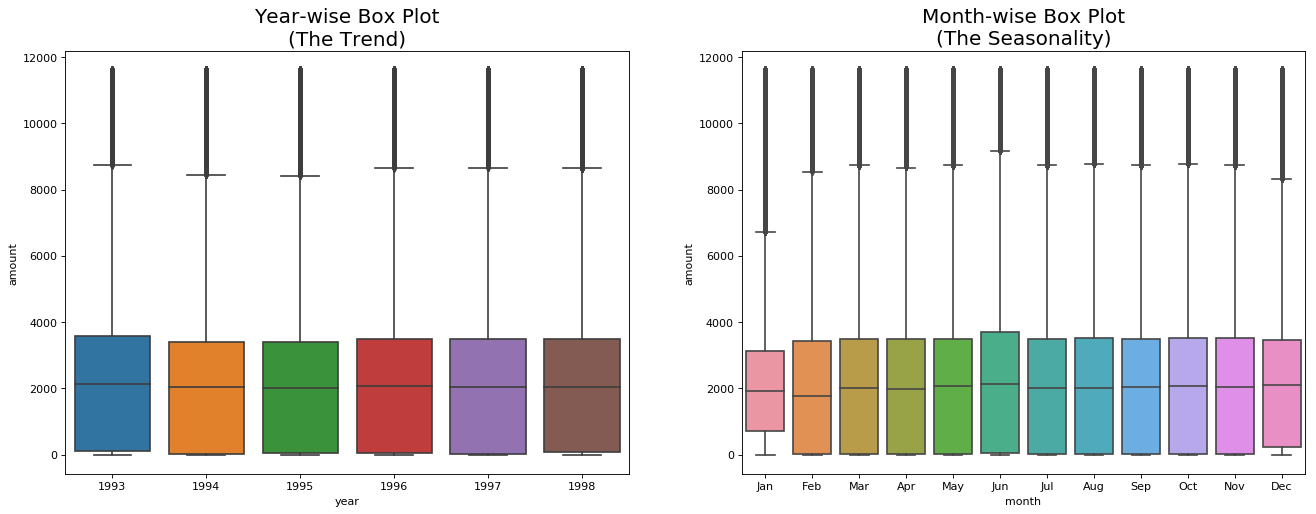

In [45]:
# Prepare data
years = withdrawal_df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='amount', data=withdrawal_df, ax=axes[0])
sns.boxplot(x='month', y='amount', data=withdrawal_df.loc[~withdrawal_df.year.isin([1993, 1998]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()
# The months of 

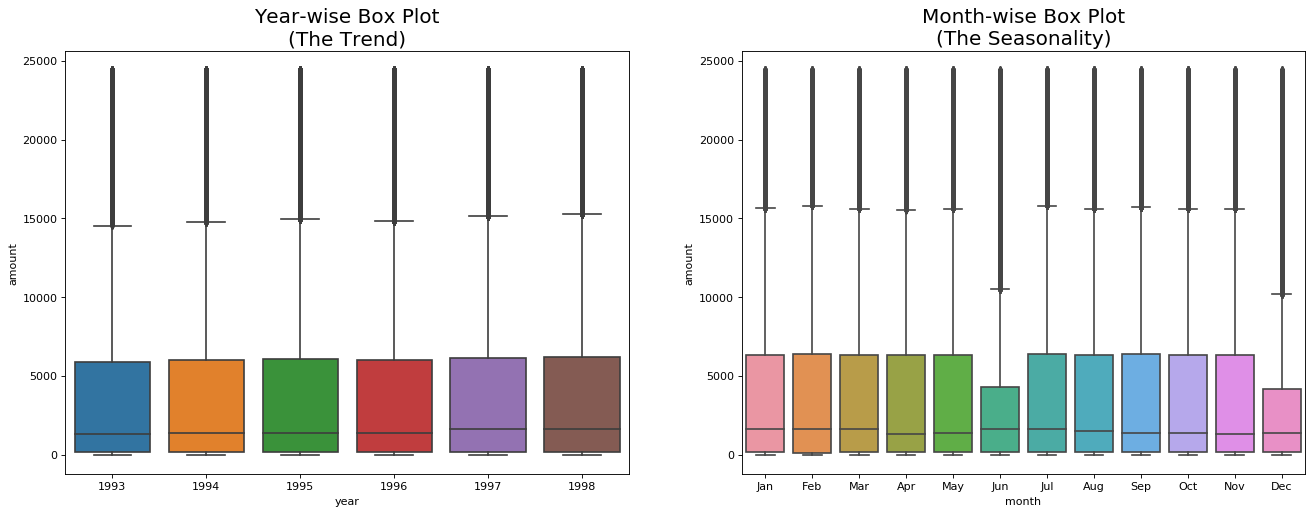

In [46]:
# Prepare data
years = credit_df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='amount', data=credit_df, ax=axes[0])
sns.boxplot(x='month', y='amount', data=credit_df.loc[~credit_df.year.isin([1993, 1998]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()
# The months of ...

In [48]:
# We have all months and years 1993 - 1998, none missing
import datetime as dt
trans_df['year'] = trans_df['date'].dt.year
trans_df['month'] = trans_df['date'].dt.month

trans_df['year'].unique()
print(trans_df[trans_df['year'] == 1993].month.unique())
print(trans_df[trans_df['year'] == 1994].month.unique())
print(trans_df[trans_df['year'] == 1995].month.unique())
print(trans_df[trans_df['year'] == 1996].month.unique())
print(trans_df[trans_df['year'] == 1997].month.unique())
print(trans_df[trans_df['year'] == 1998].month.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [49]:
trans_out_df = trans_df[(trans_df['amount'] > 300) & (trans_df['type'] == 'CREDIT')]
trans_out_df.trans_id.count()

229509

In [50]:
''' examine only the unknown transaction types. '''
''' they are labeled as withdrawal_in_cash '''
unknown_trans_type = trans_df[trans_df['type'] == 'UNKNOWN']
unknown_trans_type.head()


trans_id  account_id       date     type           operation   amount  \
994     144918         485 1993-03-26  UNKNOWN  WITHDRAWAL_IN_CASH   5166.0   
1101    144919         485 1993-03-31  UNKNOWN  WITHDRAWAL_IN_CASH  19168.0   
1650    615628        2099 1993-04-14  UNKNOWN  WITHDRAWAL_IN_CASH  20200.0   
1686    144921         485 1993-04-17  UNKNOWN  WITHDRAWAL_IN_CASH  14491.0   
2081    527820        1801 1993-04-30  UNKNOWN  WITHDRAWAL_IN_CASH   5669.0   

      balance k_symbol bank  account  year  month  
994   88602.9  UNKNOWN  NaN      NaN  1993      3  
1101  69668.0  UNKNOWN  NaN      NaN  1993      3  
1650  27692.5  UNKNOWN  NaN      NaN  1993      4  
1686  21393.0  UNKNOWN  NaN      NaN  1993      4  
2081  71710.8  UNKNOWN  NaN      NaN  1993      4

In [51]:
withdrawal_trans_type = trans_df[trans_df['type'] == 'WITHDRAWAL']
withdrawal_trans_type.head()

trans_id  account_id       date        type                 operation  \
136    695560        2378 1993-01-31  WITHDRAWAL        WITHDRAWAL_IN_CASH   
189    145127         485 1993-02-03  WITHDRAWAL        WITHDRAWAL_IN_CASH   
222   1028004        3510 1993-02-06  WITHDRAWAL        WITHDRAWAL_IN_CASH   
233    695340        2378 1993-02-07  WITHDRAWAL  REMITTANCE_TO_OTHER_BANK   
249    622121        2122 1993-02-07  WITHDRAWAL        WITHDRAWAL_IN_CASH   

      amount  balance   k_symbol bank    account  year  month  
136  34700.0  59453.7    UNKNOWN  NaN        NaN  1993      1  
189  25300.0  46177.9    UNKNOWN  NaN        NaN  1993      2  
222   1600.0  22271.0    UNKNOWN  NaN        NaN  1993      2  
233   9612.0  80033.7  HOUSEHOLD   EF  1222903.0  1993      2  
249  14100.0  32859.1    UNKNOWN  NaN        NaN  1993      2

In [52]:
unkop_trans_type = trans_df[trans_df['operation'] == 'UNKNOWN']
#unkop_trans_type = unk_trans_type[unk_trans_type['operation'] == 'UNKNOWN']
unkop_trans_type.head()

trans_id  account_id       date    type operation  amount  balance  \
137   3591421        1844 1993-01-31  CREDIT   UNKNOWN    12.6   3754.6   
138   3617490        2632 1993-01-31  CREDIT   UNKNOWN    47.5  15411.5   
139   3579543        1493 1993-01-31  CREDIT   UNKNOWN    13.3   5222.3   
140   3558798         866 1993-01-31  CREDIT   UNKNOWN    37.1  13181.1   
141   3453599        6473 1993-01-31  CREDIT   UNKNOWN    17.0  21078.0   

              k_symbol bank  account  year  month  
137  INTEREST_CREDITED  NaN      NaN  1993      1  
138  INTEREST_CREDITED  NaN      NaN  1993      1  
139  INTEREST_CREDITED  NaN      NaN  1993      1  
140  INTEREST_CREDITED  NaN      NaN  1993      1  
141  INTEREST_CREDITED  NaN      NaN  1993      1

In [53]:
# Likely fine to set all trans_type = 'UNKNOWN' to 'WITHDRAWAL'
trans_df.loc[trans_df['type'] == 'UNKNOWN', 'type'] = 'WITHDRAWAL'

In [54]:

# we see that WITHDRAWAL_IN_CASH has trans_types UNKNOWN or WITHDRAWAL.
gb = trans_df.groupby(['operation', 'type'])
gb['amount'].count()

operation                   type      
CC_WITHDRAWAL               WITHDRAWAL      8036
COLLECTION_FROM_OTHER_BANK  CREDIT         65226
CREDIT_IN_CASH              CREDIT        156743
REMITTANCE_TO_OTHER_BANK    WITHDRAWAL    208283
UNKNOWN                     CREDIT        183114
WITHDRAWAL_IN_CASH          WITHDRAWAL    434918
Name: amount, dtype: int64

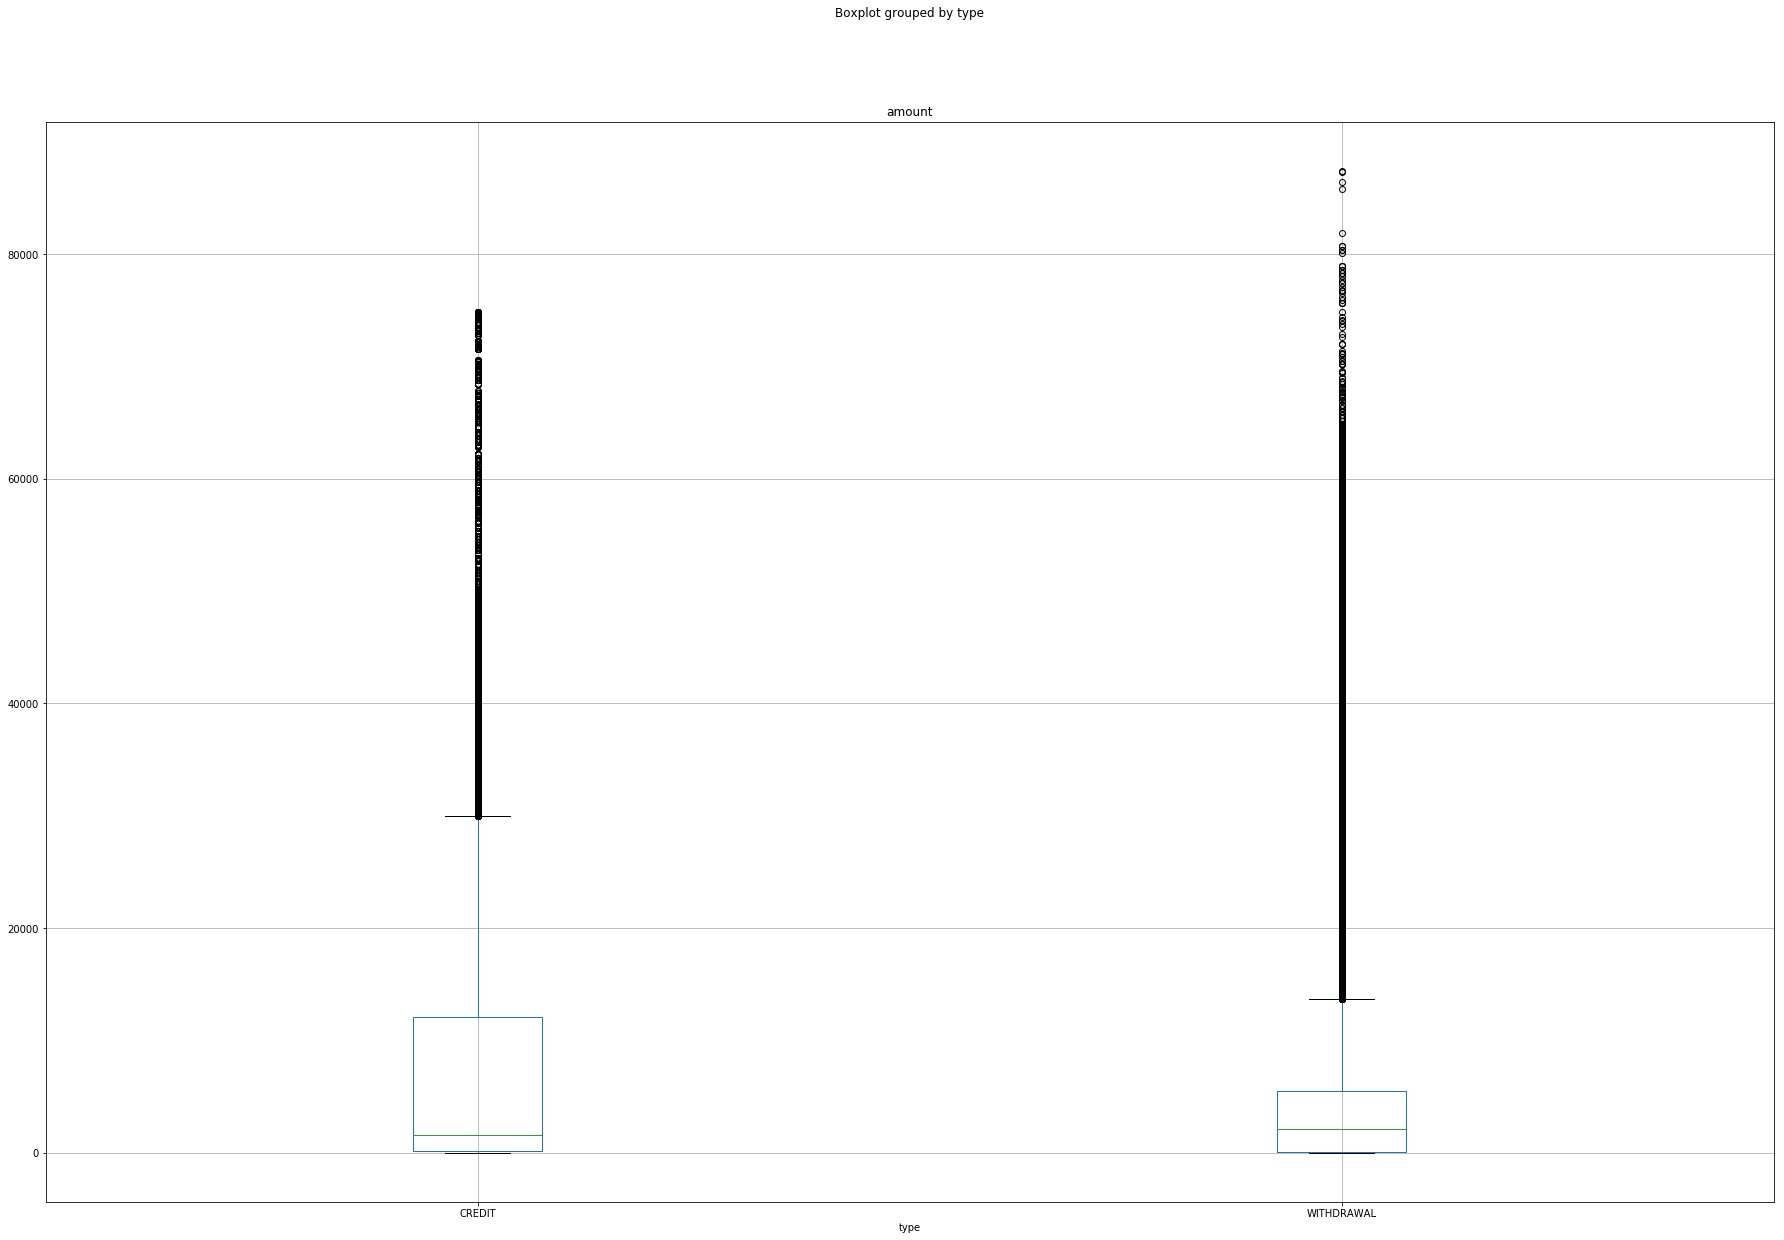

In [55]:
# new boxplot with UNKNOWN trans_type set to WITHDRAWAL. Again, it shows that withdrawals are more skewed than credits.
boxplot(trans_df, ['amount'], by='type')

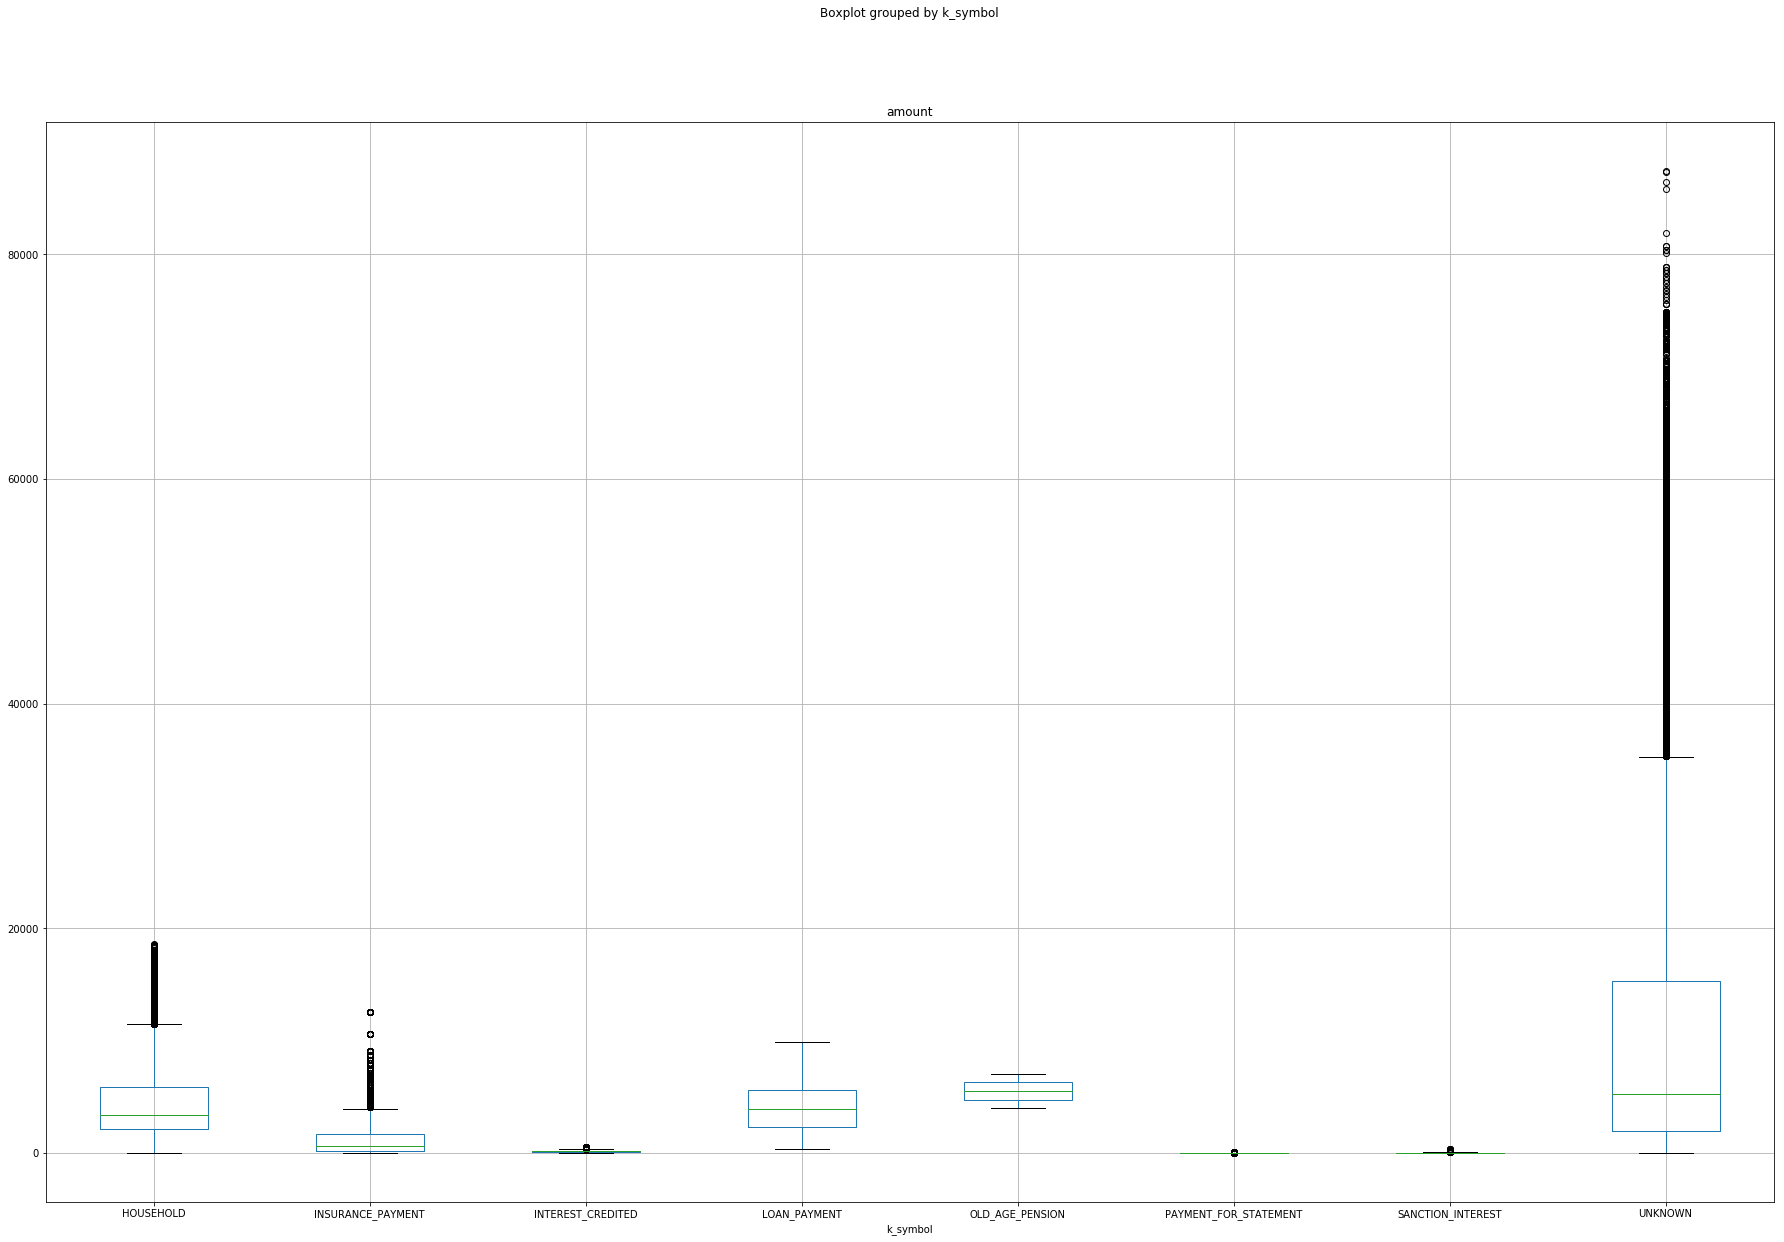

In [56]:

# This boxplot shows that unknown transactions are more highly skewed, which is not surprising.
# One possibility is that we only focus on the transactions we have no information about.
# Household and insurance payment are also skewed as well, but not to the same extent as unknown.
# all the other trans_k_symbols have lower variance and see to be the types which can be ignored.
boxplot(trans_df, ['amount'], by='k_symbol')

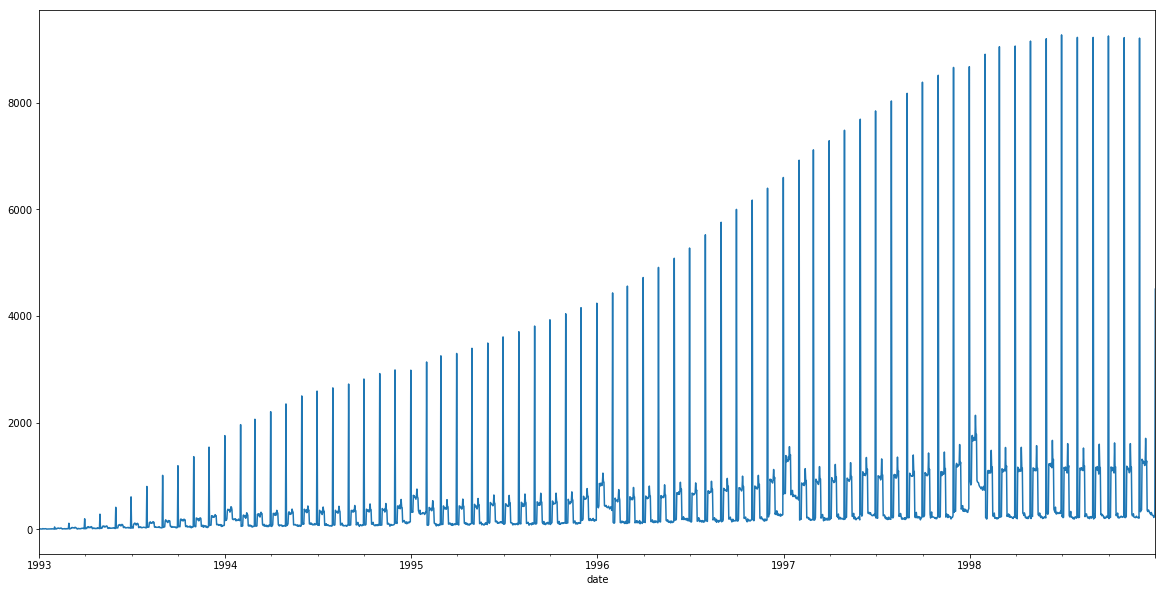

In [57]:

# this graph shows the number of transactions by date. We see a periodic nature perhaps due to regular payments, salary
# and interest credits. We can also see that the number of transactions has grown over the years, which could be due to 
# a larger number of accounts or greater transactions/account.
gb = trans_df.groupby(['date'])
trans_by_date = gb['amount'].count()
trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

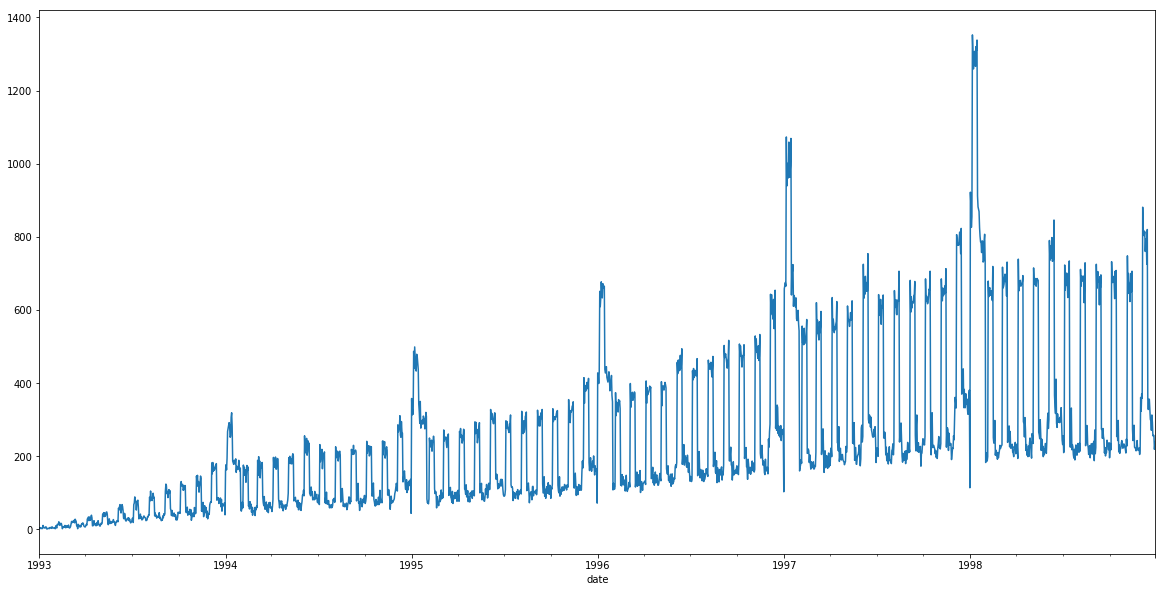

In [58]:
# filtering for only trans_k_symbol = 'UNKNOWN' shows these types of transactions are more heavily skewed than the
# known types. We still see certain seasonality spikes in the graph. There are more transactions occurring in the 
# first two weeks of each month. The first two weeks of January have the most activity. June and December are also months
# where higher than average transaction activity occurs.
gb = trans_df.loc[trans_df['k_symbol'] == 'UNKNOWN'].groupby(['date'])
unk_trans_by_date = gb['amount'].count()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

In [60]:

# there seems to be a spike in transactions during the first two weeks of January.
unk_trans_by_date.sort_values(axis=0, ascending=False)[1:50]
unk_trans_by_date.sort_values(axis=0, ascending=False)[50:100]

date
1998-01-25    788
1998-01-21    786
1998-01-22    783
1997-12-08    780
1997-12-07    777
1997-12-09    777
1998-06-07    776
1998-06-12    768
1998-06-08    767
1998-12-10    760
1998-01-23    757
1997-12-13    754
1997-06-14    754
1998-11-05    748
1998-06-09    742
1998-04-05    739
1998-06-13    737
1998-06-06    736
1998-07-14    734
1998-01-27    734
1998-06-11    733
1998-10-05    732
1998-01-30    732
1998-01-26    731
1998-03-14    731
1998-08-14    729
1998-09-05    725
1997-06-05    725
1998-12-13    725
1997-01-18    724
1998-07-05    723
1997-01-16    722
1998-02-14    719
1998-03-05    717
1998-05-05    715
1997-11-14    713
1998-08-05    711
1998-10-14    708
1997-08-14    706
1997-10-14    706
1997-01-17    706
1998-10-12    706
1998-11-14    706
1998-09-08    705
1998-07-12    701
1998-07-08    701
1998-11-12    700
1998-11-07    700
1998-03-10    698
1998-09-14    696
Name: amount, dtype: int64

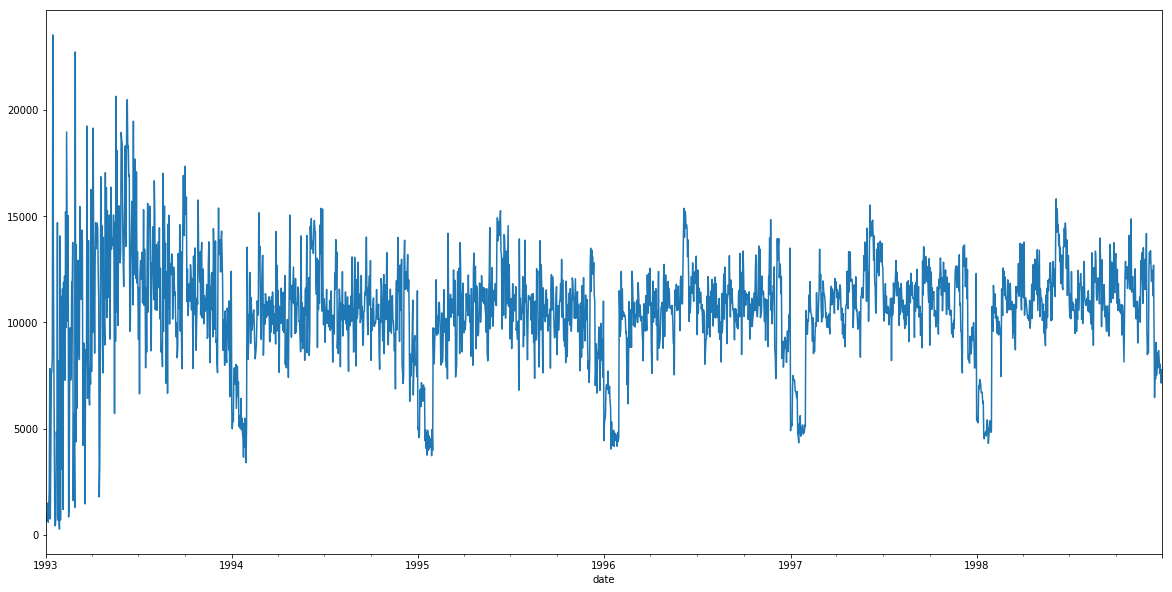

In [61]:
# average transaction size seems to have seasonality affects. The size has been stable during the most recent years.
unk_trans_by_date = gb['amount'].mean()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

In [62]:

# see if there are any interesting dates to look out for.
unk_trans_by_date.sort_values(axis=0, ascending=True)[1:50]

date
1993-01-19     433.333333
1993-01-20     450.000000
1993-01-06     600.000000
1993-01-04     650.000000
1993-01-25     700.000000
1993-01-30     700.000000
1993-01-03     740.000000
1993-01-10     750.000000
1993-01-02     750.000000
1993-01-27     760.000000
1993-01-01     800.000000
1993-02-15     850.000000
1993-01-21     880.000000
1993-02-04    1200.000000
1993-01-07    1260.500000
1993-02-27    1291.666667
1993-03-19    1458.333333
1993-01-05    1500.333333
1993-02-16    1533.333333
1993-02-24    1616.666667
1993-04-16    1787.700000
1993-01-08    2136.909091
1993-02-01    3100.000000
1993-04-17    3299.400000
1994-01-29    3397.237500
1993-02-02    3490.000000
1994-01-24    3659.485207
1993-01-11    3686.000000
1995-01-28    3727.325342
1995-01-19    3753.368231
1993-01-18    3764.000000
1993-02-26    3971.428571
1995-01-30    3982.320388
1995-01-22    3989.033445
1996-01-15    4038.744292
1995-01-17    4075.517241
1993-01-23    4085.000000
1994-01-26    4112.167665
1995-01

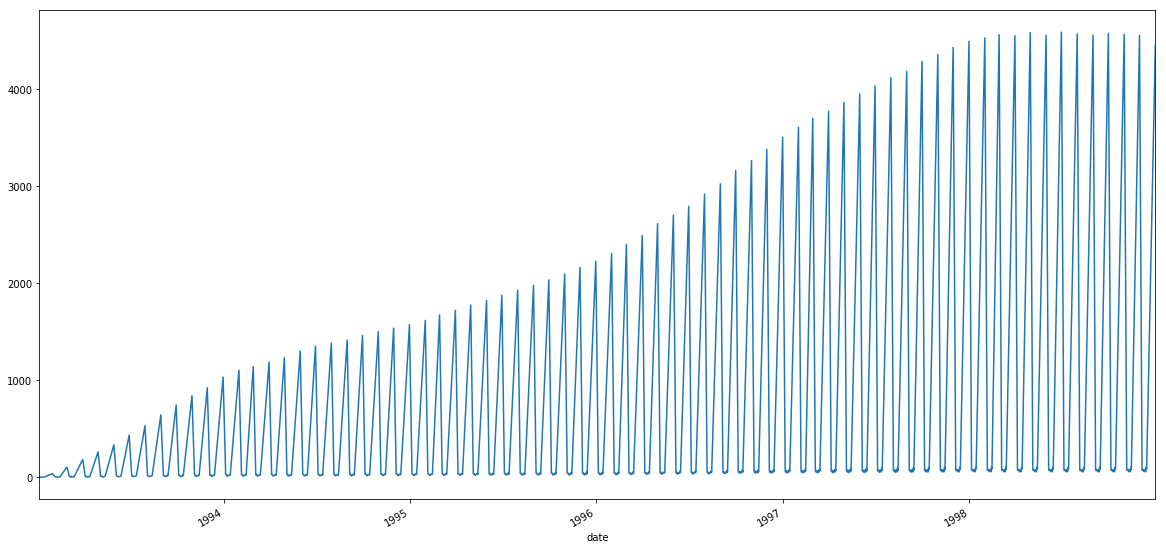

In [63]:
# Look at 'KNOWN' credit transactions. We see a periodic shape, which shows evidence that these are periodic payments that
# are occurring.
gb = trans_df.loc[(trans_df['k_symbol'] != 'UNKNOWN') & (trans_df['type'] == 'CREDIT')].groupby(['date'])
unk_trans_by_date = gb['amount'].count()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

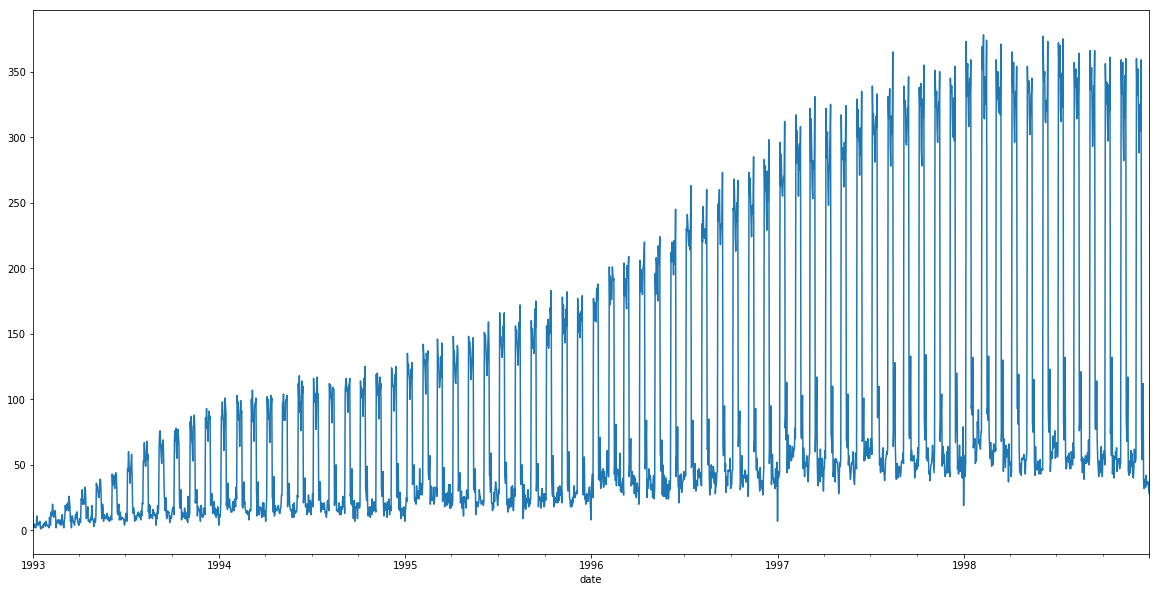

In [64]:
# look at unknown credit transactions. Although the plot is more choppy than the known transactions graph,
# the shape resembles the the known transactions which could indicate that most of the credit activity are 
# periodic occurrences such as salary.
gb = trans_df.loc[(trans_df['k_symbol'] == 'UNKNOWN') & (trans_df['type'] == 'CREDIT')].groupby(['date'])
unk_trans_by_date = gb['amount'].count()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

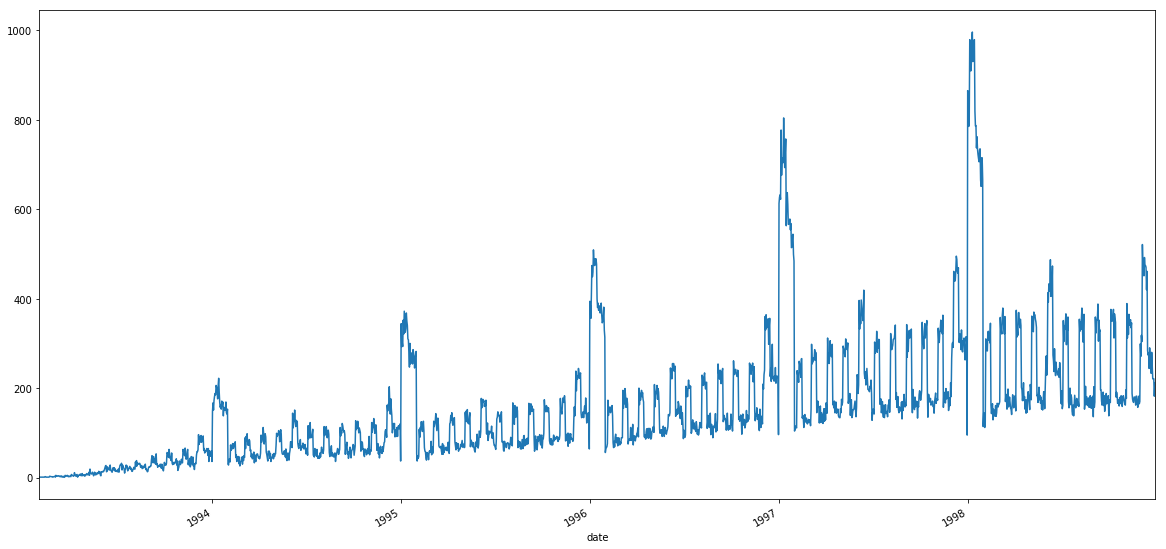

In [65]:
# here we see unknown withdrawals. They are also periodic, but are more highly skewed.
gb = trans_df.loc[(trans_df['k_symbol'] == 'UNKNOWN') & (trans_df['type'] == 'WITHDRAWAL')].groupby(['date'])
unk_trans_by_date = gb['amount'].count()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

In [66]:
unk_trans_by_date.sort_values(axis=0, ascending=True)[1000:1500]

date
1995-03-07    121
1997-03-27    121
1997-03-20    122
1995-06-17    122
1996-09-20    122
1996-07-21    122
1995-05-10    122
1997-02-24    122
1996-08-30    122
1995-12-26    122
1996-08-16    122
1996-09-02    123
1995-04-06    123
1994-11-05    123
1994-07-09    123
1996-08-01    123
1995-03-10    123
1997-02-28    123
1997-03-23    123
1995-07-11    124
1998-02-04    124
1997-02-22    124
1995-05-11    124
1997-02-26    124
1995-04-10    124
1996-10-31    124
1996-10-29    124
1997-02-21    125
1996-09-15    125
1995-02-09    125
             ... 
1998-10-20    174
1997-05-21    174
1998-10-03    174
1998-05-20    174
1997-08-02    174
1998-05-04    174
1997-05-16    174
1998-04-23    174
1995-10-05    174
1998-10-26    175
1996-05-11    175
1998-11-16    175
1997-11-02    175
1997-05-02    175
1998-08-30    175
1995-06-08    175
1997-08-15    175
1996-04-13    175
1997-11-21    176
1994-12-12    176
1997-11-03    176
1994-01-11    176
1997-07-17    176
1998-10-30    177
1996-

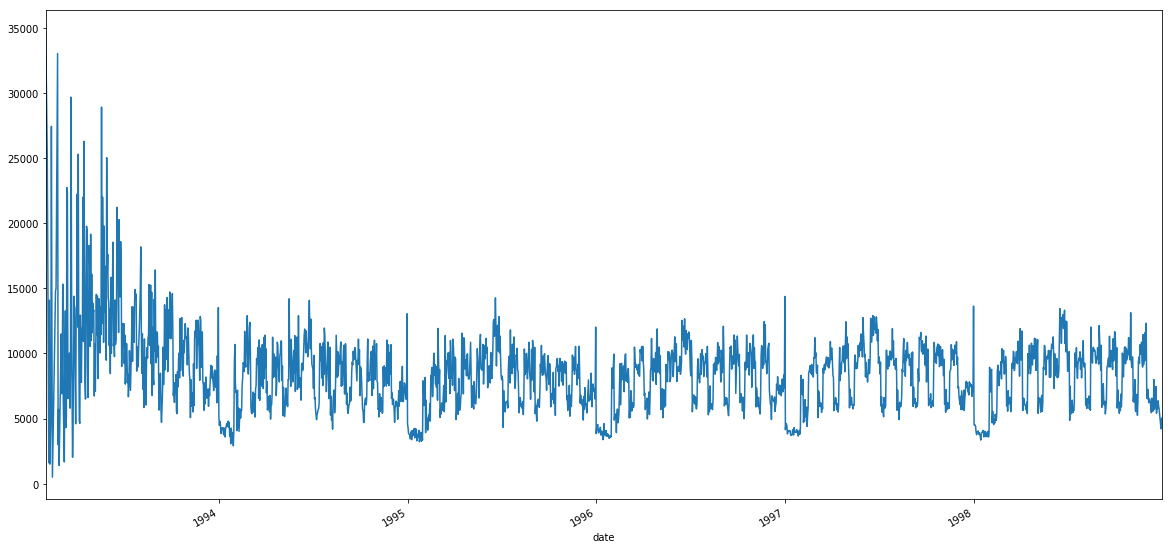

In [67]:
# average transaction size of unknown withdrawals look to be stable during the most recent years.
gb = trans_df.loc[(trans_df['k_symbol'] == 'UNKNOWN') & (trans_df['type'] == 'WITHDRAWAL')].groupby(['date'])
unk_trans_by_date = gb['amount'].mean()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

In [68]:
gb = trans_df.groupby(['type', 'k_symbol'])
gb['trans_id'].count()

type        k_symbol             
CREDIT      INTEREST_CREDITED        183114
            OLD_AGE_PENSION           30338
            UNKNOWN                  191631
WITHDRAWAL  HOUSEHOLD                118065
            INSURANCE_PAYMENT         18500
            LOAN_PAYMENT              13580
            PAYMENT_FOR_STATEMENT    155832
            SANCTION_INTEREST          1577
            UNKNOWN                  343683
Name: trans_id, dtype: int64

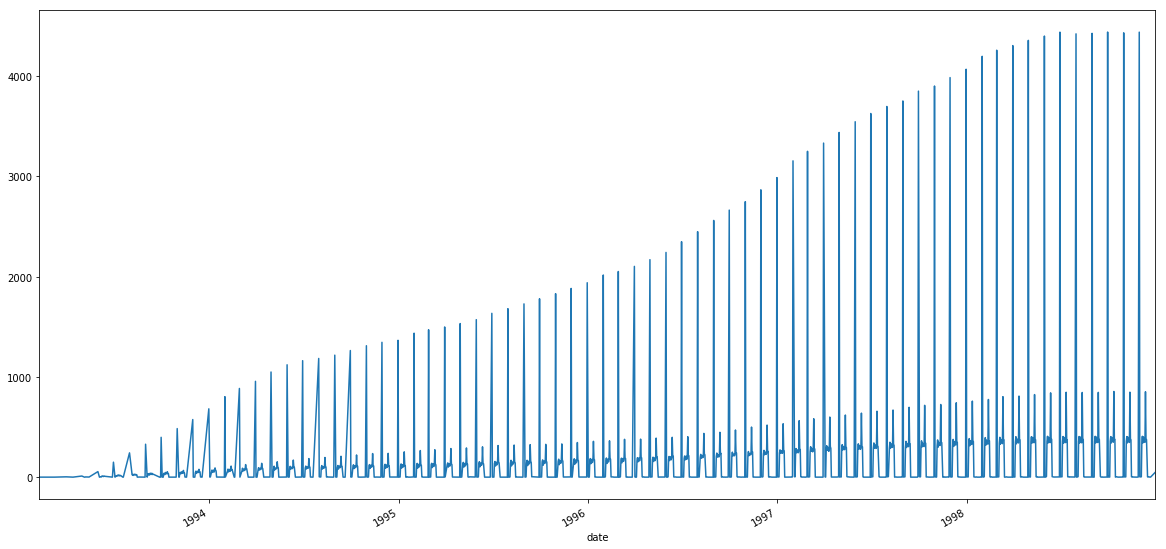

In [69]:
# known withdrawals tend to resemble known credit transactions and are more predictable. Since they tend to be 
# routine payments we will not focus on these types initially.
gb = trans_df.loc[(trans_df['k_symbol'] != 'UNKNOWN') & (trans_df['type'] == 'WITHDRAWAL')].groupby(['date'])
unk_trans_by_date = gb['amount'].count()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

In [70]:
# - Known transactions (loan payments, interest, etc...) tend to be periodic and more predictable than unknown.

# - Transaction count for both credit and withdrawals are seasonal in nature.

# - Unknown withdrawal and credit transaction types are quite different in nature. Both display seasonality patters 
#   but withdrawals are more highly skewed and less predictable. 

# - A large part of the unknown credit transactions include routine payments like salary.

# - Average transaction amount is also seasonal but has been stable over time.

# - An withdrawal anomaly would have different characteristics than a credit anomaly.
# - look at only unknown transactions.


In [71]:
account_df.head()

account_id  district_id statement_freq creation_date  days_after_start_date
0         576           55        MONTHLY    1993-01-01                      0
1        3818           74        MONTHLY    1993-01-01                      0
2         704           55        MONTHLY    1993-01-01                      0
3        2378           16        MONTHLY    1993-01-01                      0
4        2632           24        MONTHLY    1993-01-02                      1

In [72]:
# merge transactions with account and district information.
account_df['account_district_id'] = account_df['district_id']
trans_account_df = pd.merge(trans_df, account_df, on='account_id', how='inner')
print(trans_account_df.shape)
print(trans_df.shape)


trans_district_df = pd.merge(trans_account_df, district_df, left_on='account_district_id', right_on='district_id', how='inner') # verify if it joined correctly!
print(trans_district_df.shape)

del trans_account_df


(1056320, 17)
(1056320, 12)
(1056320, 33)


In [85]:
print(trans_district_df.trans_id.count())
trans_district_df.sort_values(by=['account_id'])

1056320


trans_id  account_id       date        type  \
1020614        46           1 1998-09-13      CREDIT   
1020461       168           1 1996-05-31  WITHDRAWAL   
1020460       212           1 1996-05-17  WITHDRAWAL   
1020459       131           1 1996-05-13  WITHDRAWAL   
1020458        18           1 1996-05-13      CREDIT   
1020457        66           1 1996-05-05  WITHDRAWAL   
1020456   3530450           1 1996-04-30      CREDIT   
1020455       167           1 1996-04-30  WITHDRAWAL   
1020454       211           1 1996-04-17  WITHDRAWAL   
1020453        17           1 1996-04-13      CREDIT   
1020452        65           1 1996-04-05  WITHDRAWAL   
1020451   3530449           1 1996-03-31      CREDIT   
1020450       166           1 1996-03-31  WITHDRAWAL   
1020462   3530451           1 1996-05-31      CREDIT   
1020449       210           1 1996-03-18      CREDIT   
1020447        64           1 1996-03-05  WITHDRAWAL   
1020446   3530448           1 1996-02-29      CREDIT   
1020445       165           1 1996-02-29  WITHDRAWAL   
1020444       209           1 1996-02-17      CREDIT   
1020443        15           1 1996-02-13      CREDIT   
1020442        63           1 1996-02-05  WITHDRAWAL   
1020441   3530447           1 1996-01-31      CREDIT   
1020440       164           1 1996-01-31  WITHDRAWAL   
1020439       137           1 1996-01-27  WITHDRAWAL   
1020438       108           1 1996-01-21  WITHDRAWAL   
1020437       109           1 1996-01-18  WITHDRAWAL   
1020615       196           1 1998-09-30  WITHDRAWAL   
1020448        16           1 1996-03-13      CREDIT   
1020436       208           1 1996-01-18  WITHDRAWAL   
1020463        67           1 1996-06-05  WITHDRAWAL   
...           ...         ...        ...         ...   
47101     3459094       11382 1997-12-31      CREDIT   
47100     3431233       11382 1997-12-31  WITHDRAWAL   
47099     3431151       11382 1997-12-18  WITHDRAWAL   
47098     3431097       11382 1997-12-10      CREDIT   
47097     3431272       11382 1997-12-07  WITHDRAWAL   
47096     3530296       11382 1997-11-30      CREDIT   
47104     3431175       11382 1998-01-02  WITHDRAWAL   
47137     3431278       11382 1998-06-05  WITHDRAWAL   
47115     3530298       11382 1998-01-31      CREDIT   
47117     3431196       11382 1998-02-08  WITHDRAWAL   
47135     3459099       11382 1998-05-31      CREDIT   
47134     3431238       11382 1998-05-31  WITHDRAWAL   
47133     3431102       11382 1998-05-10      CREDIT   
47132     3431277       11382 1998-05-06  WITHDRAWAL   
47131     3530301       11382 1998-04-30      CREDIT   
47130     3459098       11382 1998-04-30      CREDIT   
47129     3431237       11382 1998-04-30  WITHDRAWAL   
47128     3431101       11382 1998-04-10      CREDIT   
47116     3431274       11382 1998-02-05  WITHDRAWAL   
47127     3431276       11382 1998-04-06  WITHDRAWAL   
47125     3459097       11382 1998-03-31      CREDIT   
47124     3431236       11382 1998-03-31  WITHDRAWAL   
47123     3431100       11382 1998-03-10      CREDIT   
47122     3431275       11382 1998-03-07  WITHDRAWAL   
47121     3530299       11382 1998-02-28      CREDIT   
47120     3459096       11382 1998-02-28      CREDIT   
47119     3431235       11382 1998-02-28  WITHDRAWAL   
47118     3431099       11382 1998-02-10      CREDIT   
47126     3530300       11382 1998-03-31      CREDIT   
47092     3431271       11382 1997-11-07  WITHDRAWAL   

                          operation   amount  balance               k_symbol  \
1020614  COLLECTION_FROM_OTHER_BANK   3679.0  14597.8                UNKNOWN   
1020461          WITHDRAWAL_IN_CASH     14.6  14425.4  PAYMENT_FOR_STATEMENT   
1020460          WITHDRAWAL_IN_CASH   1900.0  14376.7                UNKNOWN   
1020459          WITHDRAWAL_IN_CASH    660.0  16276.7                UNKNOWN   
1020458  COLLECTION_FROM_OTHER_BANK   3679.0  16936.7                UNKNOWN   
1020457    REMITTANCE_TO_OTHER_BANK   2452.0  13257.7   

In [77]:
##########################################################################################################################################################################################

In [78]:
trans_df.head()

trans_id  account_id       date    type       operation  amount  balance  \
0    695247        2378 1993-01-01  CREDIT  CREDIT_IN_CASH   700.0    700.0   
1    171812         576 1993-01-01  CREDIT  CREDIT_IN_CASH   900.0    900.0   
2    207264         704 1993-01-01  CREDIT  CREDIT_IN_CASH  1000.0   1000.0   
3   1117247        3818 1993-01-01  CREDIT  CREDIT_IN_CASH   600.0    600.0   
4    579373        1972 1993-01-02  CREDIT  CREDIT_IN_CASH   400.0    400.0   

  k_symbol bank  account  year  month  
0  UNKNOWN  NaN      NaN  1993      1  
1  UNKNOWN  NaN      NaN  1993      1  
2  UNKNOWN  NaN      NaN  1993      1  
3  UNKNOWN  NaN      NaN  1993      1  
4  UNKNOWN  NaN      NaN  1993      1

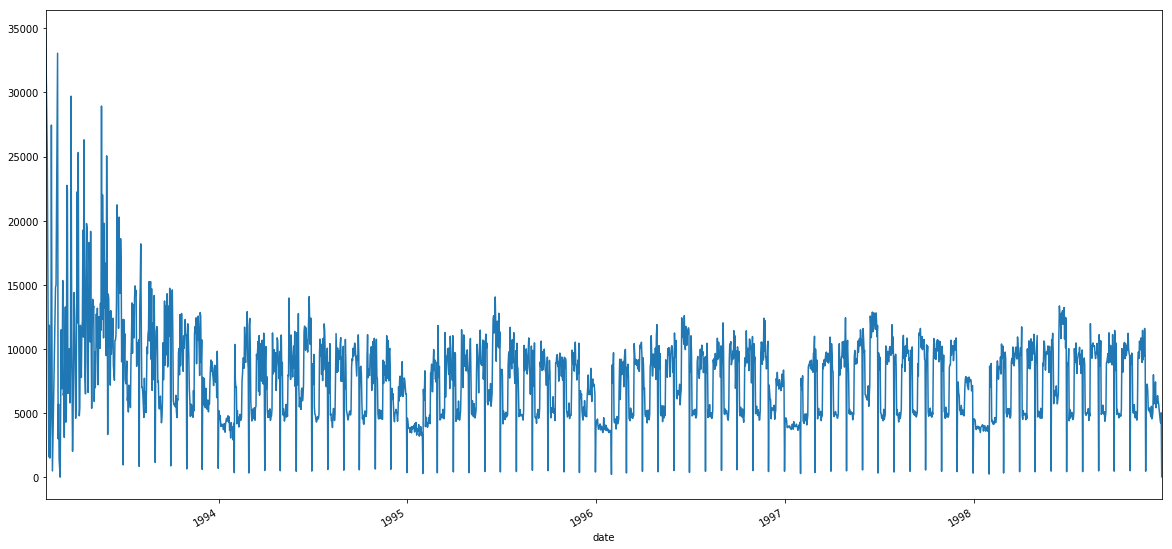

In [79]:
# average transaction size seems to have seasonality affects. The size has been stable during the most recent years.
gb = trans_df.loc[trans_df['type'] == 'WITHDRAWAL'].groupby(['date'])
unk_trans_by_date = gb['amount'].mean()
unk_trans_by_date.plot(kind='line', subplots=False, figsize=(20,10))

In [80]:
trans_df_part = trans_df.loc[(trans_df['type'] == 'CREDIT')]


In [82]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average- too big, use range (offset)
#df_ma = trans_df_part.set_index('date').amount.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(trans_df_part.amount, np.arange(len(trans_df_part.amount)), frac=0.05)[:, 1], index=trans_df_part.index, columns=['amount'])
df_loess_15 = pd.DataFrame(lowess(trans_df_part.amount, np.arange(len(trans_df_part.amount)), frac=0.15)[:, 1], index=trans_df_part.index, columns=['amount'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
trans_df_part['amount'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['amount'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['amount'].plot(ax=axes[2], title='Loess Smoothed 15%')
#df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Transactions time series - smooth', y=0.95, fontsize=14)
plt.show()

KeyboardInterrupt: 

In [ ]:
trans_df.head()

In [86]:
# Keep for db upload
account_df.to_csv('clean/account.csv')
loan_df.to_csv('clean/loan.csv')
order_df.to_csv('clean/order.csv')
trans_df.to_csv('clean/trans.csv')
disp_df.to_csv('clean/disp.csv')
district_df.to_csv('clean/district.csv')
client_df.to_csv('clean/client.csv')
card_df.to_csv('clean/card.csv')
trans_district_df.to_csv('clean/trans_distr.csv')